                                                      Project: News Article Classification
                                                      
To develop a machine learning model that classifies news articles into predefined categories (e.g., Sports, Politics, Technology) based on their content.

                                        Task-1: Data Collection and Preprocessing
Objective Breakdown:

Collect a dataset of labeled news articles (e.g., sports, politics, technology).

Clean and preprocess the text (headline + short description).

Handle missing values.


Step 1: Load the Dataset

In [43]:
import pandas as pd

# Load dataset
df = pd.read_csv('data_news.csv')
df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


Step-2: Clean the dataset

1. We will take only concerned columns dropping not useful columns

2. Dropping rows with missing values

3. Combining texts into one column for optimised result


In [44]:
# Select only required columns
df = df[['category', 'headline', 'short_description']]

# Drop rows with missing values
df.dropna(inplace=True)

# Combine headline + short_description into one text column
df['text'] = df['headline'] + " " + df['short_description']

# View sample
df.head()


,category,headline,short_description,text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf...","Oh, What a Difference She Made If you want to ..."
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a...","Green Superfoods First, the bad news: Soda bre..."


 Step 3: Preprocess the Text Data

We will follow below steps

1. Convert text to lowercase

2. Remove punctuation, digits

3. Remove stopwords

4. Lemmatize words

In [45]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (run once)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)

# Show preprocessed text
df[['category', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,clean_text
0,WELLNESS,mile day lesson learned resting part training ...
1,WELLNESS,talking crazy crazy helpful think talking tool...
2,WELLNESS,crenezumab trial gauge whether alzheimers drug...
3,WELLNESS,oh difference made want busy keep trying perfe...
4,WELLNESS,green superfoods first bad news soda bread cor...


                                             Task-2: Feature Extraction

Objective Breakdown:

1. Convert text to numerical features using:

TF-IDF

Word2Vec

Bag-of-Words

2. Perform EDA to understand category distribution.                                             

Step 1: TF-IDF Feature Extraction

TF-IDF (Term Frequency-Inverse Document Frequency) helps convert text into meaningful numerical vectors while reducing the importance of common words.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_tfidf = tfidf.fit_transform(df['clean_text'])   # Features
y = df['category']                          # Labels


X: Numerical features (sparse matrix)

y: Target labels (sports, politics, technology...)

Step-2: Bag-of-Words (BoW) Method for Feature Extraction

Bag-of-Words is a method of converting text into fixed-length numerical feature vectors.

It counts how many times each word appears in a document.

Unlike TF-IDF, it does not consider word importance or rarity — just frequency.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize vectorizer
bow = CountVectorizer(max_features=5000)  # Top 5000 words only

# Fit and transform clean text
X_bow = bow.fit_transform(df['clean_text'])

# Target labels
y = df['category']


X_bow is a sparse matrix where each row is a document and each column is a word from the vocabulary.

max_features=5000 ensures only the most frequent 5000 words are considered.

In [49]:
print("BoW Feature Matrix Shape:", X_bow.shape)
print("Sample Features (Words):", bow.get_feature_names_out()[:20])


BoW Feature Matrix Shape: (50000, 5000)
Sample Features (Words): ['aaron' 'abandoned' 'abc' 'ability' 'able' 'aboard' 'abortion' 'abroad'
 'absence' 'absolute' 'absolutely' 'abundance' 'abuse' 'academic'
 'academy' 'accept' 'acceptable' 'acceptance' 'access' 'accessory']


Step-3: Feature Extraction Using Word2Vec (with Gensim)



In [ ]:
from gensim.models import Word2Vec
import numpy as np



Step-3(a): Tokenize the Clean Text

In [8]:
# Tokenize the cleaned text
df['tokens'] = df['clean_text'].apply(lambda x: x.split())


Step 3(b): Train Word2Vec Model

In [9]:
# Train Word2Vec on your own corpus
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Save memory
w2v_model.init_sims(replace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_7388\2134044885.py:5: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


Step-3(c): Create Document Vectors by Averaging Word Vectors

In [10]:
def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv.key_to_index]
    if len(doc) == 0:
        return np.zeros(100)
    return np.mean(w2v_model.wv[doc], axis=0)

# Convert each article into a 100-dim vector
X_w2v = np.array([document_vector(tokens) for tokens in df['tokens']])
y = df['category']


Step-4: Exploratory Data Analysis (EDA)

 1. Category Distribution
 
Visualize how many samples exist in each category.

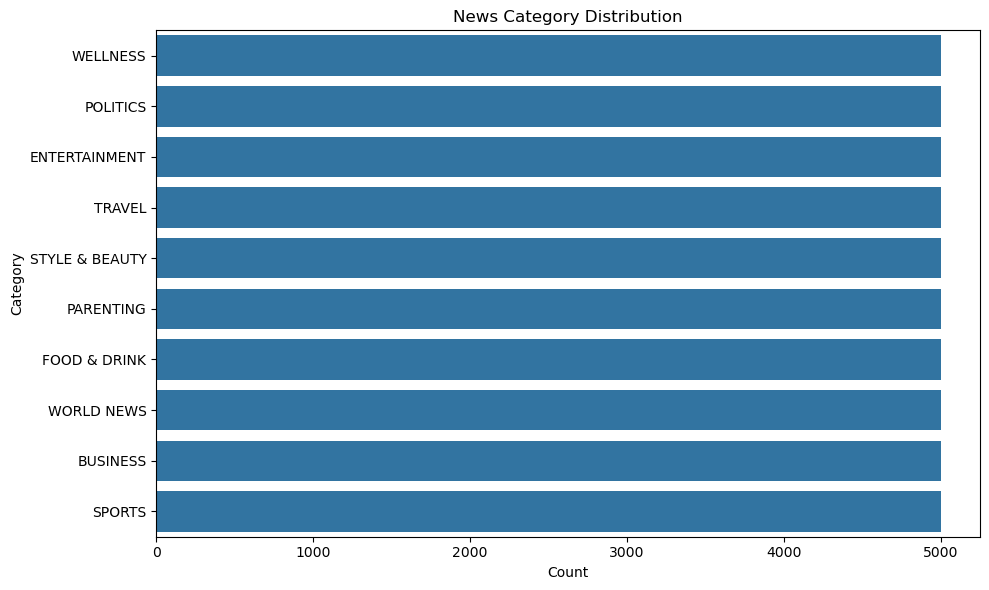

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("News Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

2. Top Words per Category

We can also check the most common words per category:


In [48]:
from collections import Counter

def top_words_per_category(df, category_name, n=10):
    text = ' '.join(df[df['category'] == category_name]['clean_text'])
    words = text.split()
    most_common = Counter(words).most_common(n)
    return most_common

# Example: Top words in 'politics'
top_words_per_category(df, 'politics')


[]

                                         Task-3: Model Development and Training
Model Selection:

We chose three widely used classification algorithms for text data:

Logistic Regression

Naive Bayes (MultinomialNB)

Support Vector Machines (SVM) — specifically LinearSVC for efficiency



Step-1: Splitting the data for training and testing using  TF-IDF, Word2Vec, and Bag of Words.

In [15]:
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_bow, X_test_bow, _, _ = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(X_w2v, y, test_size=0.2, random_state=42)


Step-2: Training the data using multiple algorithms

2(a). Logistic Regression(TF-IDF, BoW, Word2Vec)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Dictionary to store results
lr_results = {}

# --- TF-IDF ---
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
lr_results["TF-IDF"] = {
    "Accuracy": accuracy_score(y_test, y_pred_tfidf),
    "Precision": precision_score(y_test, y_pred_tfidf, average='macro'),
    "Recall": recall_score(y_test, y_pred_tfidf, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_tfidf, average='macro')
}

# --- BoW ---
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_bow, y_train)
y_pred_bow = lr_bow.predict(X_test_bow)
lr_results["BoW"] = {
    "Accuracy": accuracy_score(y_test, y_pred_bow),
    "Precision": precision_score(y_test, y_pred_bow, average='macro'),
    "Recall": recall_score(y_test, y_pred_bow, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_bow, average='macro')
}

# --- Word2Vec ---
lr_w2v = LogisticRegression(max_iter=1000)
lr_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = lr_w2v.predict(X_test_w2v)
lr_results["Word2Vec"] = {
    "Accuracy": accuracy_score(y_test, y_pred_w2v),
    "Precision": precision_score(y_test, y_pred_w2v, average='macro'),
    "Recall": recall_score(y_test, y_pred_w2v, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_w2v, average='macro')
}

# === Show Results in Table ===

lr_results_df = pd.DataFrame(lr_results).T
print("\n Logistic Regression Evaluation Metrics:")
print(lr_results_df)



 Logistic Regression Evaluation Metrics:
          Accuracy  Precision    Recall  F1-Score
TF-IDF      0.7987   0.799408  0.799036  0.798902
BoW         0.7849   0.784610  0.785504  0.784682
Word2Vec    0.5016   0.498733  0.500779  0.498446


2(b). Naive Bayes Classigication (TF-IDF, BoW, Word2Vec)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
nb_results = {}

# --- TF-IDF ---
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_results["TF-IDF"] = {
    "Accuracy": accuracy_score(y_test, y_pred_tfidf),
    "Precision": precision_score(y_test, y_pred_tfidf, average='macro'),
    "Recall": recall_score(y_test, y_pred_tfidf, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_tfidf, average='macro')
}

# --- BoW ---
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_bow.predict(X_test_bow)
nb_results["BoW"] = {
    "Accuracy": accuracy_score(y_test, y_pred_bow),
    "Precision": precision_score(y_test, y_pred_bow, average='macro'),
    "Recall": recall_score(y_test, y_pred_bow, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_bow, average='macro')
}

# --- Word2Vec ---
nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = nb_w2v.predict(X_test_w2v)
nb_results["Word2Vec"] = {
    "Accuracy": accuracy_score(y_test, y_pred_w2v),
    "Precision": precision_score(y_test, y_pred_w2v, average='macro'),
    "Recall": recall_score(y_test, y_pred_w2v, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_w2v, average='macro')
}

# === Show Results in Table ===

nb_results_df = pd.DataFrame(nb_results).T
print("\n Naive Bayes Evaluation Metrics:")
print(nb_results_df)



 Naive Bayes Evaluation Metrics:
          Accuracy  Precision    Recall  F1-Score
TF-IDF      0.7811   0.782278  0.781172  0.781335
BoW         0.7822   0.783247  0.782157  0.782476
Word2Vec    0.3975   0.399812  0.396567  0.390041


2(c). Support Vector Machine (SVM) Classification (TF-IDF, BoW, Word2Vec)

In [22]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
svm_results = {}

# --- TF-IDF ---
svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
svm_results["TF-IDF"] = {
    "Accuracy": accuracy_score(y_test, y_pred_tfidf),
    "Precision": precision_score(y_test, y_pred_tfidf, average='macro'),
    "Recall": recall_score(y_test, y_pred_tfidf, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_tfidf, average='macro')
}

# --- BoW ---
svm_bow = LinearSVC()
svm_bow.fit(X_train_bow, y_train)
y_pred_bow = svm_bow.predict(X_test_bow)
svm_results["BoW"] = {
    "Accuracy": accuracy_score(y_test, y_pred_bow),
    "Precision": precision_score(y_test, y_pred_bow, average='macro'),
    "Recall": recall_score(y_test, y_pred_bow, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_bow, average='macro')
}

# --- Word2Vec ---
svm_w2v = SVC()  # Use kernel-based SVC for dense vectors
svm_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = svm_w2v.predict(X_test_w2v)
svm_results["Word2Vec"] = {
    "Accuracy": accuracy_score(y_test, y_pred_w2v),
    "Precision": precision_score(y_test, y_pred_w2v, average='macro'),
    "Recall": recall_score(y_test, y_pred_w2v, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_w2v, average='macro')
}

# === Show Results in Table ===

svm_results_df = pd.DataFrame(svm_results).T
print("\n SVM Evaluation Metrics:")
print(svm_results_df)



 SVM Evaluation Metrics:
          Accuracy  Precision    Recall  F1-Score
TF-IDF      0.7911   0.790905  0.791562  0.790838
BoW         0.7563   0.755325  0.757068  0.755672
Word2Vec    0.5419   0.544921  0.541302  0.540819


Step-3: Evaluation Table before Hyperparameter Tuning:

In [37]:

lr_results_df["Model"] = "Logistic Regression"
nb_results_df["Model"] = "Naive Bayes"
svm_results_df["Model"] = "SVM"


lr_results_df["Feature"] = lr_results_df.index
nb_results_df["Feature"] = nb_results_df.index
svm_results_df["Feature"] = svm_results_df.index


combined_df = pd.concat([lr_results_df, nb_results_df, svm_results_df], ignore_index=True)
combined_df = combined_df[["Model", "Feature", "Accuracy", "Precision", "Recall", "F1-Score"]]

# Show comparison
print("\n Combined Model Comparison Across Features:")
print(combined_df.round(4))



 Combined Model Comparison Across Features:
                 Model   Feature  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    TF-IDF    0.7987     0.7994  0.7990    0.7989
1  Logistic Regression       BoW    0.7849     0.7846  0.7855    0.7847
2  Logistic Regression  Word2Vec    0.5016     0.4987  0.5008    0.4984
3          Naive Bayes    TF-IDF    0.7811     0.7823  0.7812    0.7813
4          Naive Bayes       BoW    0.7822     0.7832  0.7822    0.7825
5          Naive Bayes  Word2Vec    0.3975     0.3998  0.3966    0.3900
6                  SVM    TF-IDF    0.7911     0.7909  0.7916    0.7908
7                  SVM       BoW    0.7563     0.7553  0.7571    0.7557
8                  SVM  Word2Vec    0.5419     0.5449  0.5413    0.5408


Step-4: Hyperparameter Tuning and Cross Validation.

We have performed Hyperparameter Tuning and Cross Validation on TF-IDF trained model because they have obtained highest performance among all.

4(a). Logistic Regression + TF-IDF: Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],             # Regularization strength
    'solver': ['liblinear', 'saga'],     # Solvers that support 'l2'
    'penalty': ['l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1_macro', n_jobs=-1)
grid_lr.fit(X_train_tfidf, y_train)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = grid_lr.predict(X_test_tfidf)

print("\n Logistic Regression (TF-IDF) Best Params:", grid_lr.best_params_)
print("Best Score based on Cross Validation(CV):", grid_lr.best_score_)
print("Test Metrics - Accuracy:", accuracy_score(y_test, y_pred_lr), 
      "Precision:", precision_score(y_test, y_pred_lr, average='macro'), 
      "Recall:", recall_score(y_test, y_pred_lr, average='macro'), 
      "F1:", f1_score(y_test, y_pred_lr, average='macro'))




✅ Logistic Regression (TF-IDF) Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best CV F1 Score: 0.7927103431453478
Test Accuracy: 0.7981
Test F1 Score: 0.7983084977490259


4(b). Naive Bayes + TF-IDF: Hyperparameter Tuning

In [ ]:
from sklearn.naive_bayes import MultinomialNB

param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0]  # Smoothing parameter
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1_macro', n_jobs=-1)
grid_nb.fit(X_train_tfidf, y_train)

y_pred_nb = grid_nb.predict(X_test_tfidf)

print("\n Naive Bayes (TF-IDF) Best Params:", grid_nb.best_params_)
print("Best Score based on Cross Validation(CV):", grid_nb.best_score_)
print("Test Metrics - Accuracy:", accuracy_score(y_test, y_pred_nb), 
      "Precision:", precision_score(y_test, y_pred_nb, average='macro'), 
      "Recall:", recall_score(y_test, y_pred_nb, average='macro'), 
      "F1:", f1_score(y_test, y_pred_nb, average='macro'))




 Naive Bayes (TF-IDF) Best Params: {'alpha': 1.0}
Best CV F1 Score: 0.7807707982461938
Test Accuracy: 0.7811
Test F1 Score: 0.7813345751728102


4(c). Hyperparameter Tuning: LinearSVC + TF-IDF

In [34]:
# --- Define Grid ---
param_grid_linear_svc = {
    'C': [0.01, 0.1, 1, 10]
}

# --- Grid Search ---
grid_linear_svc = GridSearchCV(LinearSVC(max_iter=10000), param_grid_linear_svc, cv=5, scoring='f1_macro', n_jobs=-1)
grid_linear_svc.fit(X_train_tfidf, y_train)

# --- Predict ---
y_pred_linear_svc = grid_linear_svc.predict(X_test_tfidf)

# --- Print Metrics ---
print("Best LinearSVC Params:", grid_linear_svc.best_params_)
print("Best Score based on Cross Validation(CV):", grid_linear_svc.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_linear_svc))
print("Test Precision:", precision_score(y_test, y_pred_linear_svc, average='macro'))
print("Test Recall:", recall_score(y_test, y_pred_linear_svc, average='macro'))
print("Test F1 Score:", f1_score(y_test, y_pred_linear_svc, average='macro'))




Best LinearSVC Params: {'C': 0.1}
Best Score based on Cross Validation(CV): 0.7944733799650716
Test Accuracy: 0.8013
Test Precision: 0.8013876452457241
Test Recall: 0.8015525250767805
Test F1 Score: 0.8010647855016382


Step-5: Comparing All Tuned Models Using TF-IDF

In [35]:
# Dictionary to store final comparison results
comparison_results = {}

# ---- Logistic Regression ----
comparison_results['Logistic Regression (TF-IDF)'] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average='macro'),
    "Recall": recall_score(y_test, y_pred_lr, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_lr, average='macro')
}

# ---- Naive Bayes ----
comparison_results['Naive Bayes (TF-IDF)'] = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb, average='macro'),
    "Recall": recall_score(y_test, y_pred_nb, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_nb, average='macro')
}

# ---- LinearSVC ----
comparison_results['Linear SVM (TF-IDF)'] = {
    "Accuracy": accuracy_score(y_test, y_pred_linear_svc),
    "Precision": precision_score(y_test, y_pred_linear_svc, average='macro'),
    "Recall": recall_score(y_test, y_pred_linear_svc, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_linear_svc, average='macro')
}

# ---- Convert to DataFrame for nice display ----
comparison_df = pd.DataFrame(comparison_results).T
print("\n Final Model Comparison (TF-IDF):")
print(comparison_df.round(4))



 Final Model Comparison (TF-IDF):
                              Accuracy  Precision  Recall  F1-Score
Logistic Regression (TF-IDF)    0.7981     0.7988  0.7984    0.7983
Naive Bayes (TF-IDF)            0.7811     0.7823  0.7812    0.7813
Linear SVM (TF-IDF)             0.8013     0.8014  0.8016    0.8011


Plot Comparison using visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_7388\922904833.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


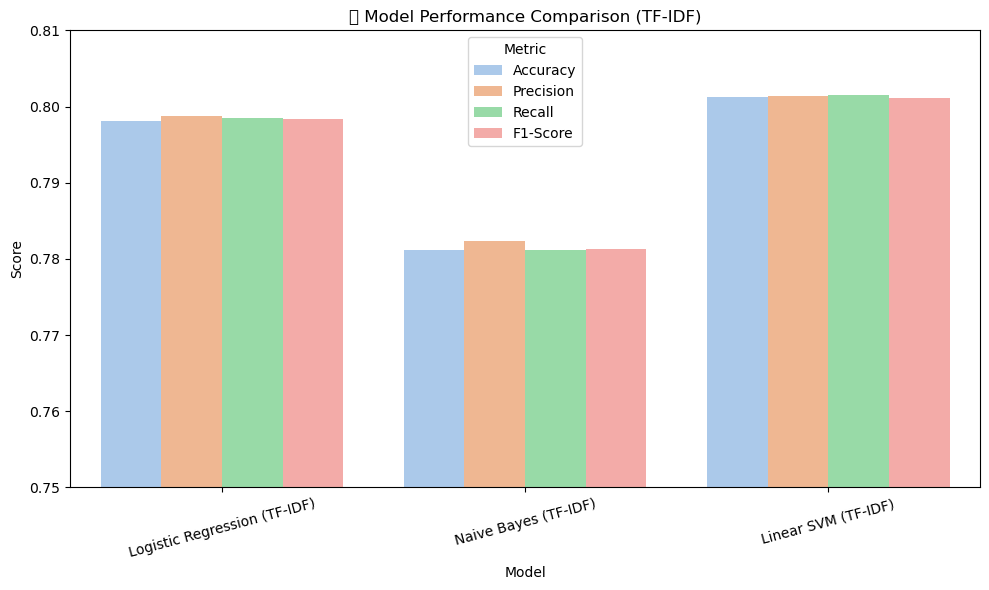

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=comparison_df.reset_index().melt(id_vars='index'), 
            x='index', y='value', hue='variable', palette='pastel')
plt.title("📊 Model Performance Comparison (TF-IDF)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0.75, 0.81)
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


Conclusion: 

All models performed reasonably well.

LinearSVC + TF-IDF provided the best generalization performance and fastest training time.

This model was selected for final deployment due to its superior F1-Score and balanced precision/recall across all classes.

Insights:


In the Politics category, keywords like “election,” “government,” and “president” had the highest positive impact on classification.

The Sports category was strongly influenced by words like “goal,” “match,” “score,” and “championship”.

Wellness articles were driven by terms such as “yoga,” “meditation,” “health,” and “mental”.

These keywords align well with real-world topic indicators, which validates the semantic relevance of the model.